<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats

import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:


# Create a pathfile to sat_scores.csv
sat_path = './sat_scores.csv'

#import a csv into list of lists
rows = []

with open( sat_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
        
# Seperate column names from data
header = rows[0] 
data = rows[1:]

# Create empty Dictionary
dict_sat = {}

# input data to dictionary
for i, c in enumerate(header):
    dict_sat[c] = []
    for row in data:
        dict_sat[c].append(row[i])

dict_sat

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Create a pandas DataFrame using .read_csv

df_sat = pd.read_csv(sat_path)
df_sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [5]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


51 rows? there should only be 50 as there are 51 states

In [6]:
df_sat['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

In [7]:
# Drop last row which is 'All' states
df_sat.drop(51, inplace=True)
df_sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


In [8]:
#.read_csv version data types
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:

# convert dictionary to DataFrame
dict_to_df_sat = pd.DataFrame.from_dict(dict_sat)

In [10]:
#dictionary version data types
dict_to_df_sat.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

Answer:

The dictionary to DataFrame version of the imported sat_scores.csv stores the Rate,Verbal 
and Math columns (originally the keys) as objects (strings) rather than integers (numbers)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
# look at first 10 rows of data only
df_sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


Answer:

The file is called sat_scores.csv, as such we can infer that the dataset is recording the scores for participants of the test. State is obviously the state in which the test is conducted, Rate would be the paticipation rate of students in the state, and Verbal and Math would be the mean result of the two parts of the test

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
df_sat.shape

(51, 4)

Answer:

State, object/string, 2 letter code representing the state

Rate, integer, participation rate in percentages

Verbal, integer, mean score of the verbal section of the test

Math, integer, mean score of the math section of the test

There are 52 columns and 4 rows in this dataset




<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

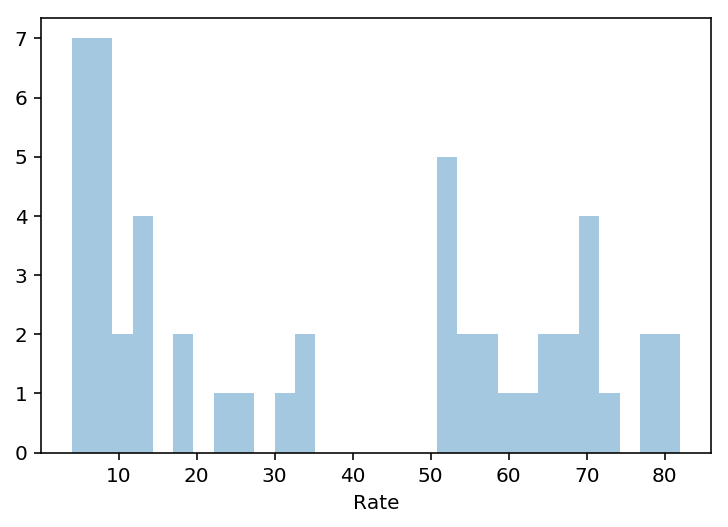

In [13]:
# distplot for Rate
sns.distplot(df_sat['Rate'], kde=False, bins=30)

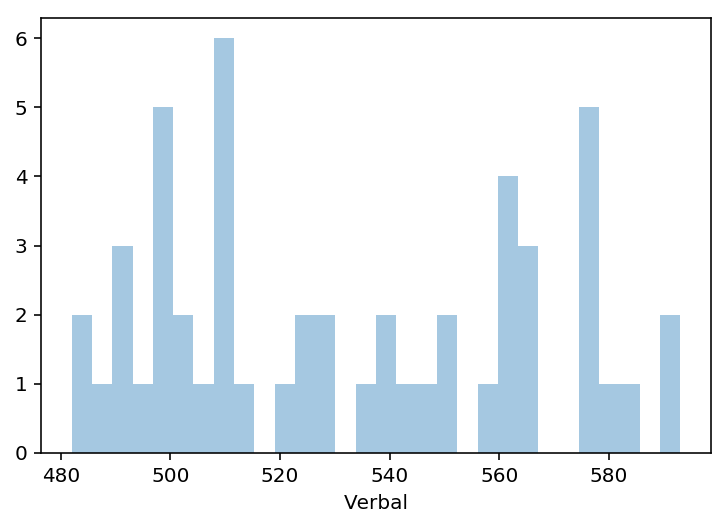

In [14]:
# distplot for Verbal
sns.distplot(df_sat['Verbal'], kde=False, bins=30)

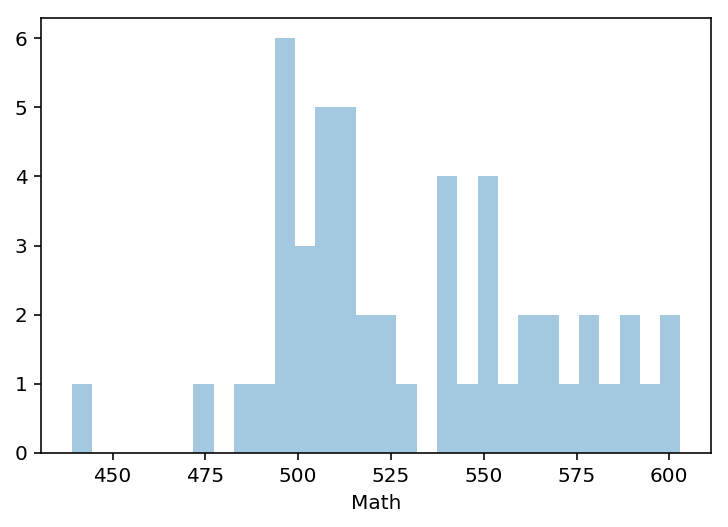

In [15]:
# distplot for Math
sns.distplot(df_sat['Math'], kde=False, bins=30)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

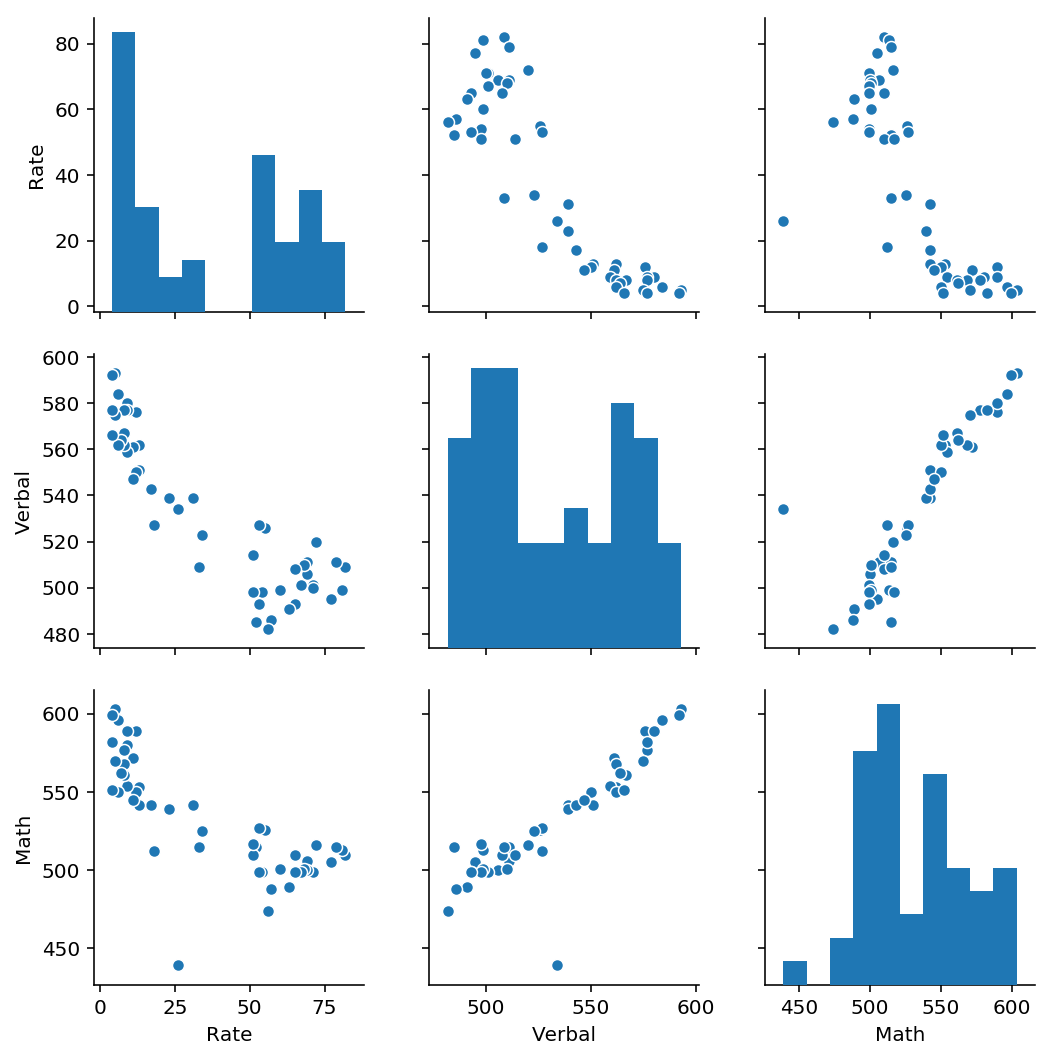

In [16]:
# pairplot of df_sat
sns.pairplot(df_sat)

Answer:

In the above pair plot there seems to be some kind of linear relationship between Verbal and Math, as one increases so does the other. There also seems to be a relationship/correlation between Rate and Verbal as well as Rate and Math. When Rate increases Verbal/Math decrease


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

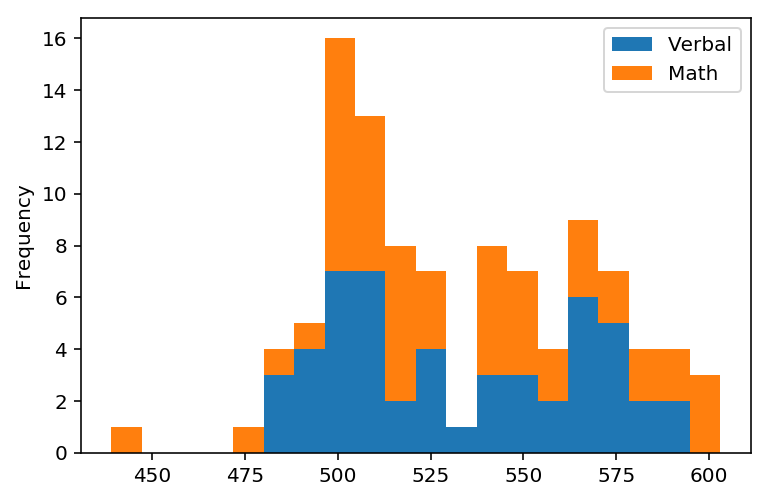

In [17]:
#create new df with only Verbal and Math as columns
df_sat_plot = df_sat[['Verbal','Math']]

#plot histogram
df_sat_plot.plot.hist(stacked=True, bins=20)


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

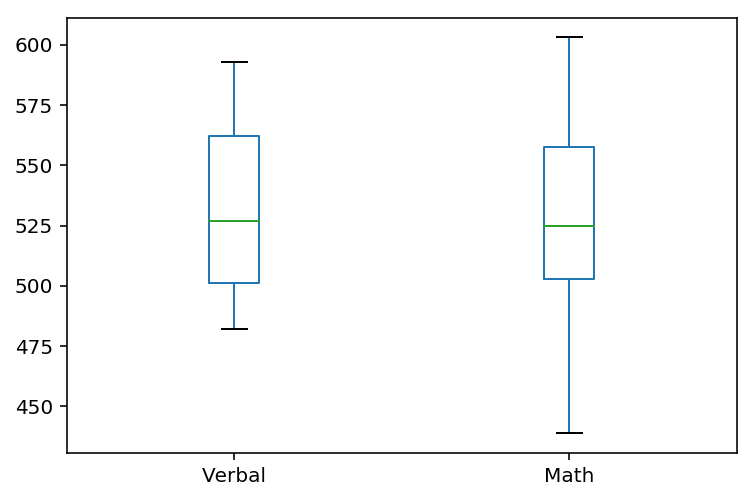

In [18]:
#plot boxplot
df_sat_plot.plot.box()

Answer:

    What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
    
Boxplots are used to graphically represent the minimum value, the first quartile, the median, the third quartile, the maximum value, and any outliers.

Histograms are used to graphically display the frequencies of a data set. 

Scatter plots are used to graphically display the relationship between two variables.

Each of the three graphs are used to depict different things about the data and depending on the situation and data will be more useful/beneficial then the other graphs

    What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

Rate is a percentage and has a different scale then Math and Vebal which are number scores



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [63]:
# create function to standardise the data in each column
def stand_data(column):
    df_sat_stand = (df_sat[column] - (df_sat[column].mean()))/df_sat[column].std()
    return df_sat_stand

# apply function to each column
sat_verb_stand = stand_data('Verbal')
sat_math_stand = stand_data('Math')
sat_rate_stand = stand_data('Rate')

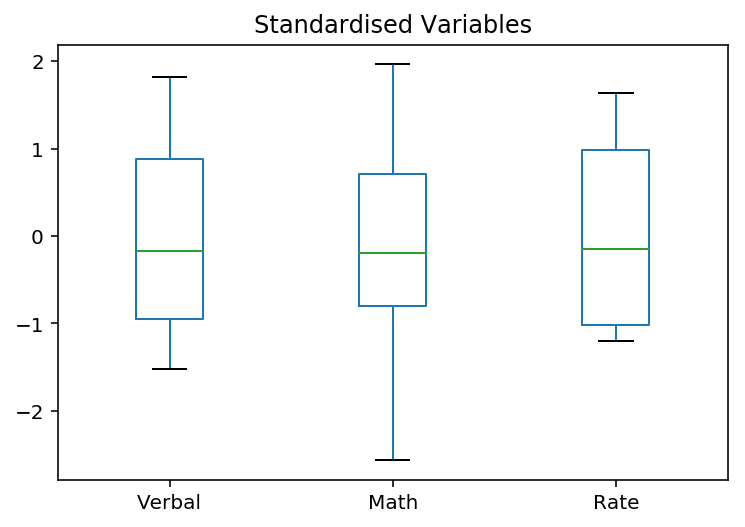

In [64]:
#concat scaled column data into a new dataframe
df_sat_stand = pd.concat([sat_verb_stand, sat_math_stand, sat_rate_stand], axis=1)

# plot standardised data
df_sat_stand.plot.box(title= 'Standardised Variables')


Answer:

Rationale for using boxplot:

    Show’s the distribution of the data
    The box shows the quartiles of the dataset
    The whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” 
    Outliers are determined using a method that is a function of the inter-quartile range.

Rationale for standarising variables:

    Standardisng, positions the variables within the same range


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [21]:
# calculate the mean of the Verbal column
verbal_mean = np.mean(df_sat['Verbal'])
verbal_mean

532.5294117647059

In [22]:
# Create a boolean column in df_sat
df_sat['Verbal_mean_check'] = df_sat['Verbal'].apply(lambda x: 'True' if x > verbal_mean else 'False')

#create new df containing only the states where verbal score is greater than the mean
df_verb_gt_mean=df_sat.loc[df_sat['Verbal_mean_check'] == 'True']

# get a count of how many states
len(df_verb_gt_mean)


24

Answer:

There are 24 of 51 states above the mean. This indicates that the distribution is balanced

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
# calculate the median  of the Verbal column
verbal_median = np.median(df_sat['Verbal'])
verbal_median

527.0

In [24]:
# Create a boolean column in df_sat
df_sat['Verbal_median_check'] = df_sat['Verbal'].apply(lambda x: 'True' if x > verbal_median else 'False')

#create new df containing only the states where verbal score is greater than the median
df_verb_gt_median=df_sat.loc[df_sat['Verbal_median_check'] == 'True']

# get a count of how many states
len(df_verb_gt_median)

24

In [25]:
#merge mean and median dataframes
mean_vs_median = df_verb_gt_median.merge(df_verb_gt_mean,how='outer', on='State')
mean_vs_median

,State,Rate_x,Verbal_x,Math_x,Verbal_mean_check_x,Verbal_median_check,Rate_y,Verbal_y,Math_y,Verbal_mean_check_y
0,CO,31,539,542,True,True,31,539,542,True
1,OH,26,534,439,True,True,26,534,439,True
2,MT,23,539,539,True,True,23,539,539,True
3,ID,17,543,542,True,True,17,543,542,True
4,TN,13,562,553,True,True,13,562,553,True
5,NM,13,551,542,True,True,13,551,542,True
6,IL,12,576,589,True,True,12,576,589,True
7,KY,12,550,550,True,True,12,550,550,True
8,WY,11,547,545,True,True,11,547,545,True
9,MI,11,561,572,True,True,11,561,572,True


Answer:

Because the data is relatively balanced/evenly distributed, this means that beacause there are no high or low values distirting the mean, the median value will be close to the mean



### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [65]:
#create new column
df_sat['score_diff'] = df_sat['Verbal'] - df_sat['Math']
df_sat.head()

,State,Rate,Verbal,Math,Verbal_mean_check,Verbal_median_check,score_diff
0,CT,82,509,510,False,False,-1
1,NJ,81,499,513,False,False,-14
2,MA,79,511,515,False,False,-4
3,NY,77,495,505,False,False,-10
4,NH,72,520,516,False,False,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [27]:
# top 10 states where Verbal is greater than Math
df_verb_gt_math = df_sat.sort_values(['score_diff'], ascending=False).head(10)

# top 10 states where Math is greater than Verbal
df_math_gt_verb = df_sat.sort_values(['score_diff']).head(10)

# top 3 states of both tables
print('Top 3 states where Verbal is greater than Math')
print(df_verb_gt_math.head(3))
print('------------------------------------------------------------------------------------')
print('Top 3 states where Math is greater than Verbal')
print(df_math_gt_verb.head(3))

Top 3 states where Verbal is greater than Math
   State  Rate  Verbal  Math Verbal_mean_check Verbal_median_check  score_diff
27    OH    26     534   439              True                True          95
50    MS     4     566   551              True                True          15
29    WV    18     527   512             False               False          15
------------------------------------------------------------------------------------
Top 3 states where Math is greater than Verbal
   State  Rate  Verbal  Math Verbal_mean_check Verbal_median_check  score_diff
21    HI    52     485   515             False               False         -30
23    CA    51     498   517             False               False         -19
1     NJ    81     499   513             False               False         -14



## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [28]:
# panda correlation func
df_sat.corr()

,Rate,Verbal,Math,score_diff
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
score_diff,-0.098671,0.044527,-0.395574,1.000000


Answer:

There is a strong correlation between Verbal and Math i.e. 0.89

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
df_sat.describe()

,Rate,Verbal,Math,score_diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
#calculate sat_scores covariance
df_sat.cov()

,Rate,Verbal,Math,score_diff
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
score_diff,-43.06,23.529412,-227.370196,250.899608


In [31]:
#calculate sat_scores correlation
df_sat.corr()

,Rate,Verbal,Math,score_diff
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
score_diff,-0.098671,0.044527,-0.395574,1.000000


        Describe how the covariance matrix is different from the correlation matrix.
Covariance is a non standardised measurement of the relationship between two variables.
Correllation is the standardised measurement of the strength and direction of the linear relationship between two variables.

        What is the process to convert the covariance into the correlation?
cov(x,y)/(std(x)*std(y))

        Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
The correlation matrix is easier to read/interpret

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [66]:
# load drug data
drug_path = './drug-use-by-age.csv'
df_drug = pd.read_csv(drug_path)
df_drug


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [33]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [34]:
df_drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64


Answer:

age - contains int and range values, what should it be?- decided to take max of range

cocaine-frequency - needs to be converted to float - contains '-'

crack-frequency - needs to be converted to float - contains '-'

heroin-frequency - needs to be converted to float - contains '-'

inhalant-frequency - needs to be converted to float - contains '-'

oxycontin-frequency - needs to be converted to float - contains '-'

meth-frequency - needs to be converted to float - contains '-'

        Columns fixed below

In [36]:
# create function to fix all issues with the frequency columns
def replace_func(x):
    df_drug[x] = df_drug[x].replace('-', np.NaN).astype(float).fillna(0.0)


In [37]:
# apply function to frequency columns
replace_func('cocaine-frequency')
replace_func('crack-frequency')
replace_func('heroin-frequency')
replace_func('inhalant-frequency')
replace_func('oxycontin-frequency')
replace_func('meth-frequency')

# checking the frequency columns have been fixed
df_drug.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,5.0,0.0,364.0,0.0,0.0,0.0,15.0


In [38]:
# checking the frequency columns have been fixed
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [39]:
#fix age column
df_drug['age_fixed']=df_drug['age'].str.extract("(\d+)-(\d+)")[1] # for rows where age is a range get max value
df_drug['age_fixed'].fillna(df_drug.age, inplace=True) # fill in NaN values with ages
df_drug['age_fixed'] = df_drug['age_fixed'].str.replace(r'+', '')# remove the '+' form '65+'

#change to float
df_drug['age_fixed'] = df_drug['age_fixed'].astype(float)


In [40]:
#checking all columns are fixed
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [41]:
#drop old age column
df_drug.drop('age', axis=1)

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_fixed
0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,...,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0,12.0
1,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13.0
2,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14.0
3,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,15.0
4,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,16.0
5,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,17.0
6,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,18.0
7,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19.0
8,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20.0
9,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,21.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [42]:
# seperate Drug use columns
df_drug['age_use'] = df_drug['age_fixed']
df_use = df_drug[[col for col in df_drug.columns if 'use' in col]]
df_use

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,age_use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,12.0
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,13.0
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,14.0
3,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,15.0
4,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,16.0
5,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5,17.0
6,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4,18.0
7,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3,19.0
8,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5,20.0
9,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3,21.0


In [43]:
# seperate Drug frequency columns
df_drug['age_frequency'] = df_drug['age_fixed']
df_freq = df_drug[[col for col in df_drug.columns if 'frequency' in col]]
df_freq

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,age_frequency
0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0,12.0
1,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0,13.0
2,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5,14.0
3,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0,15.0
4,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0,16.0
5,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5,17.0
6,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0,18.0
7,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0,19.0
8,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0,20.0
9,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0,21.0


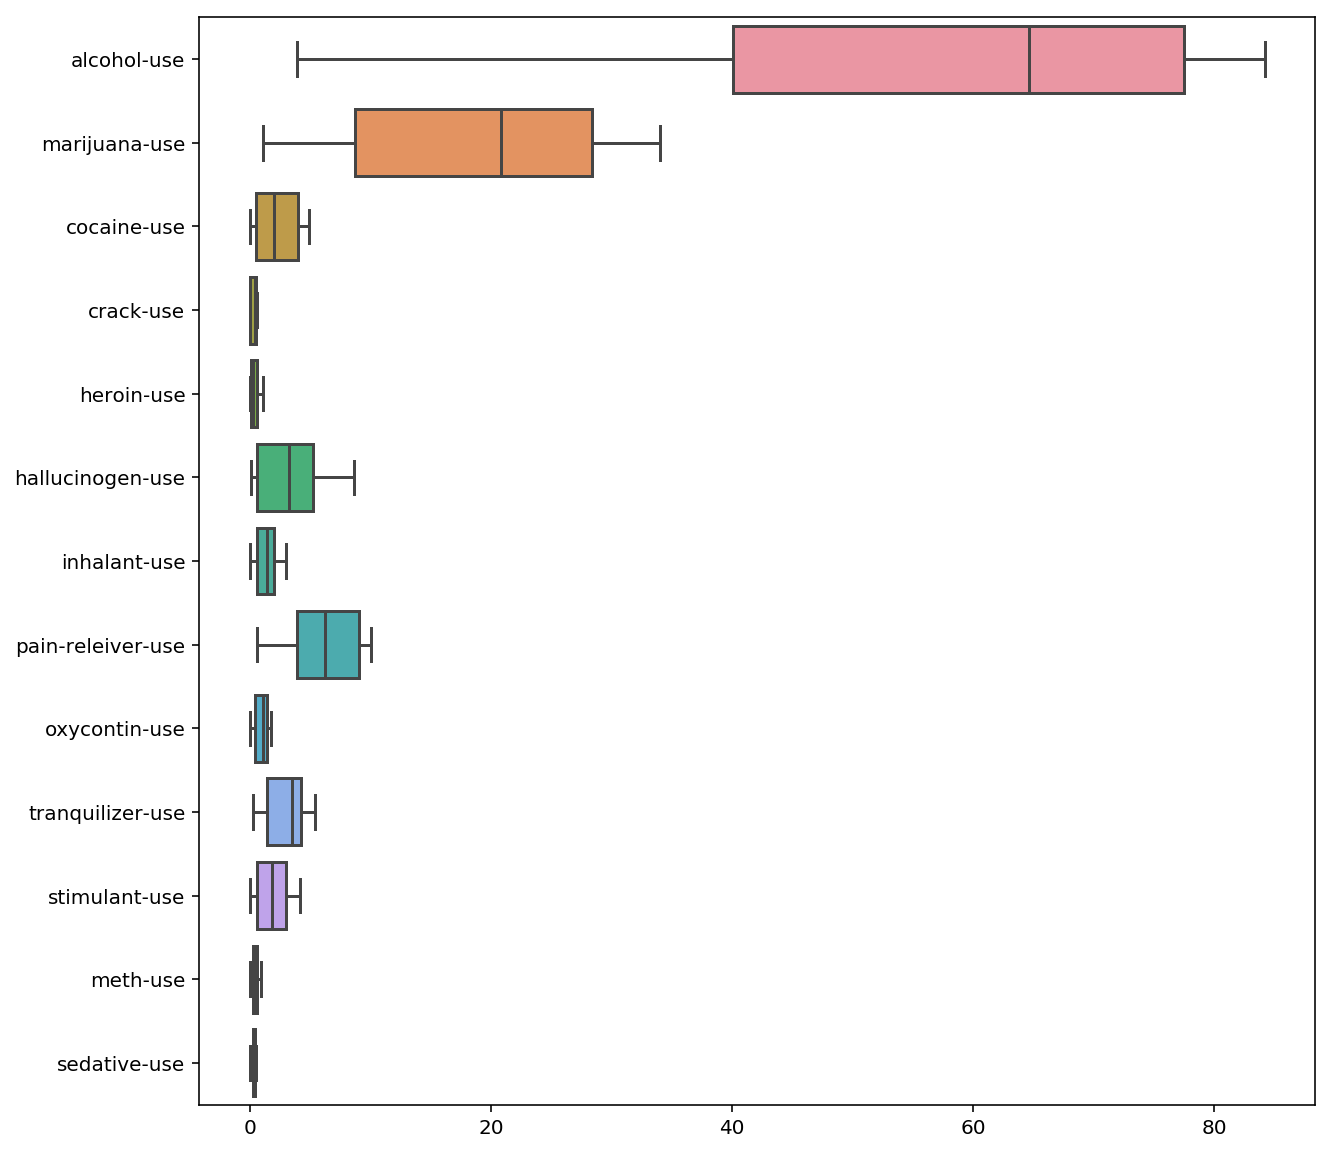

In [44]:
#box plot drug use
plt.figure(figsize=(10,10))
sns.boxplot(data=df_use.iloc[:,:-1], orient='h') 

Observations:

Alcohol and Marijuana use has the highest usage

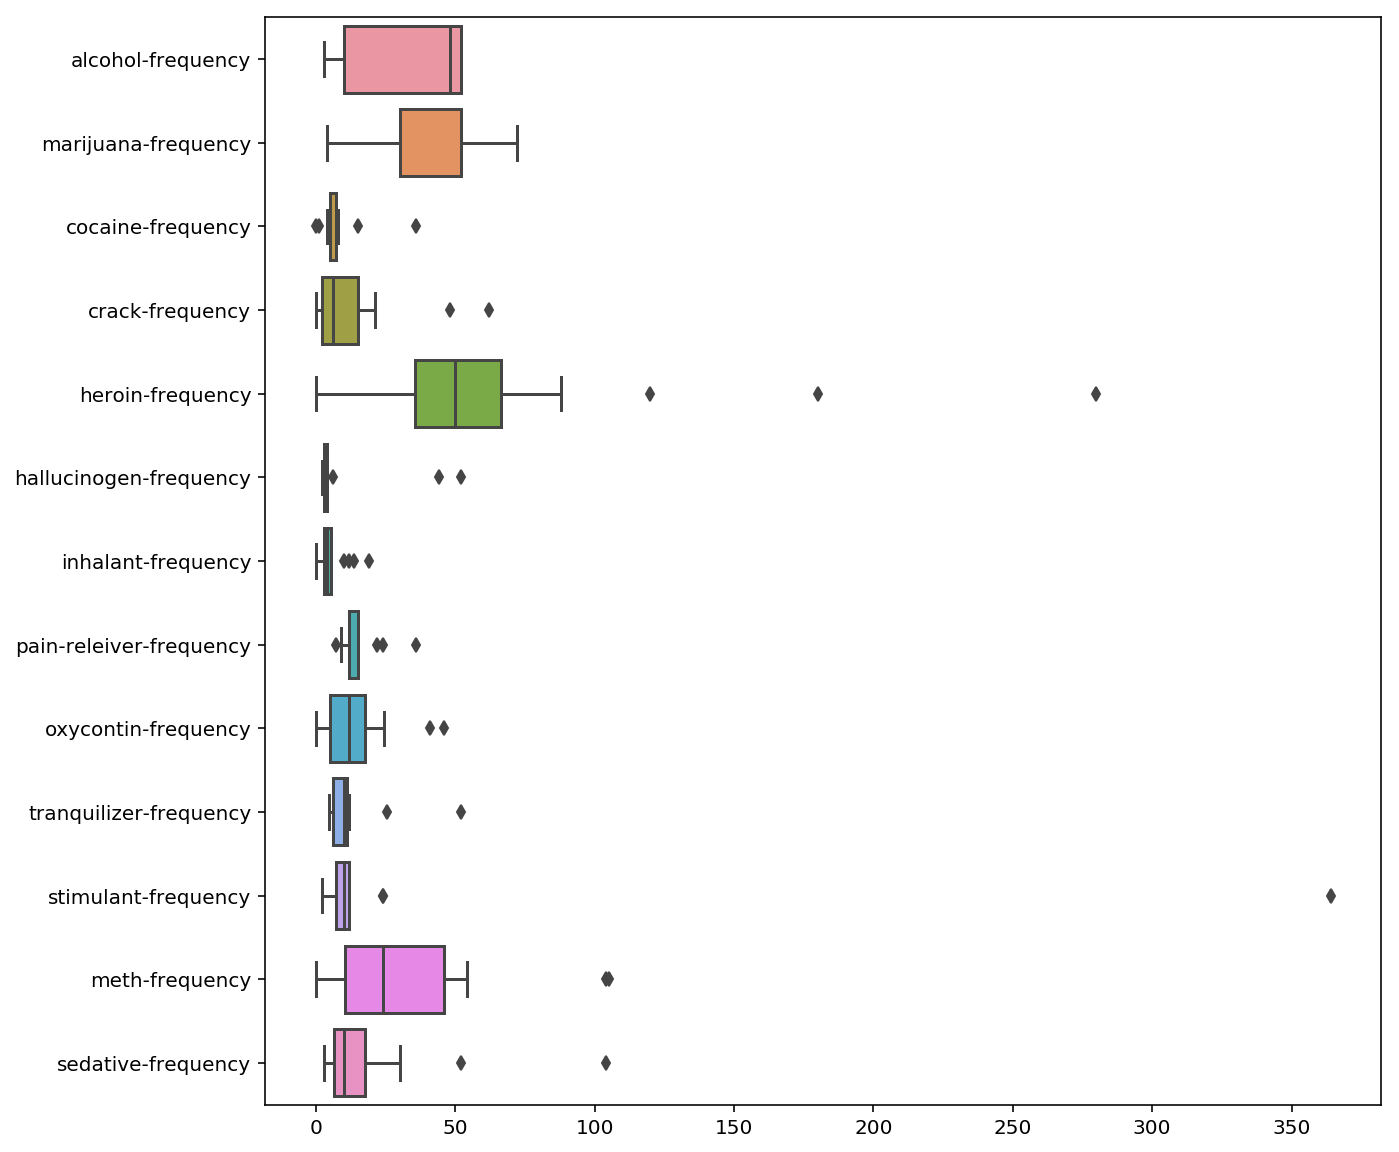

In [45]:
#box plot drug frequency
plt.figure(figsize=(10,10))
sns.boxplot(data=df_freq.iloc[:,:-1], orient='h') 

Observations:

Heroin, Marijuana, Alcohol and Meth have high frequency of use

Outliers for all drugs except alcohol and marijuana

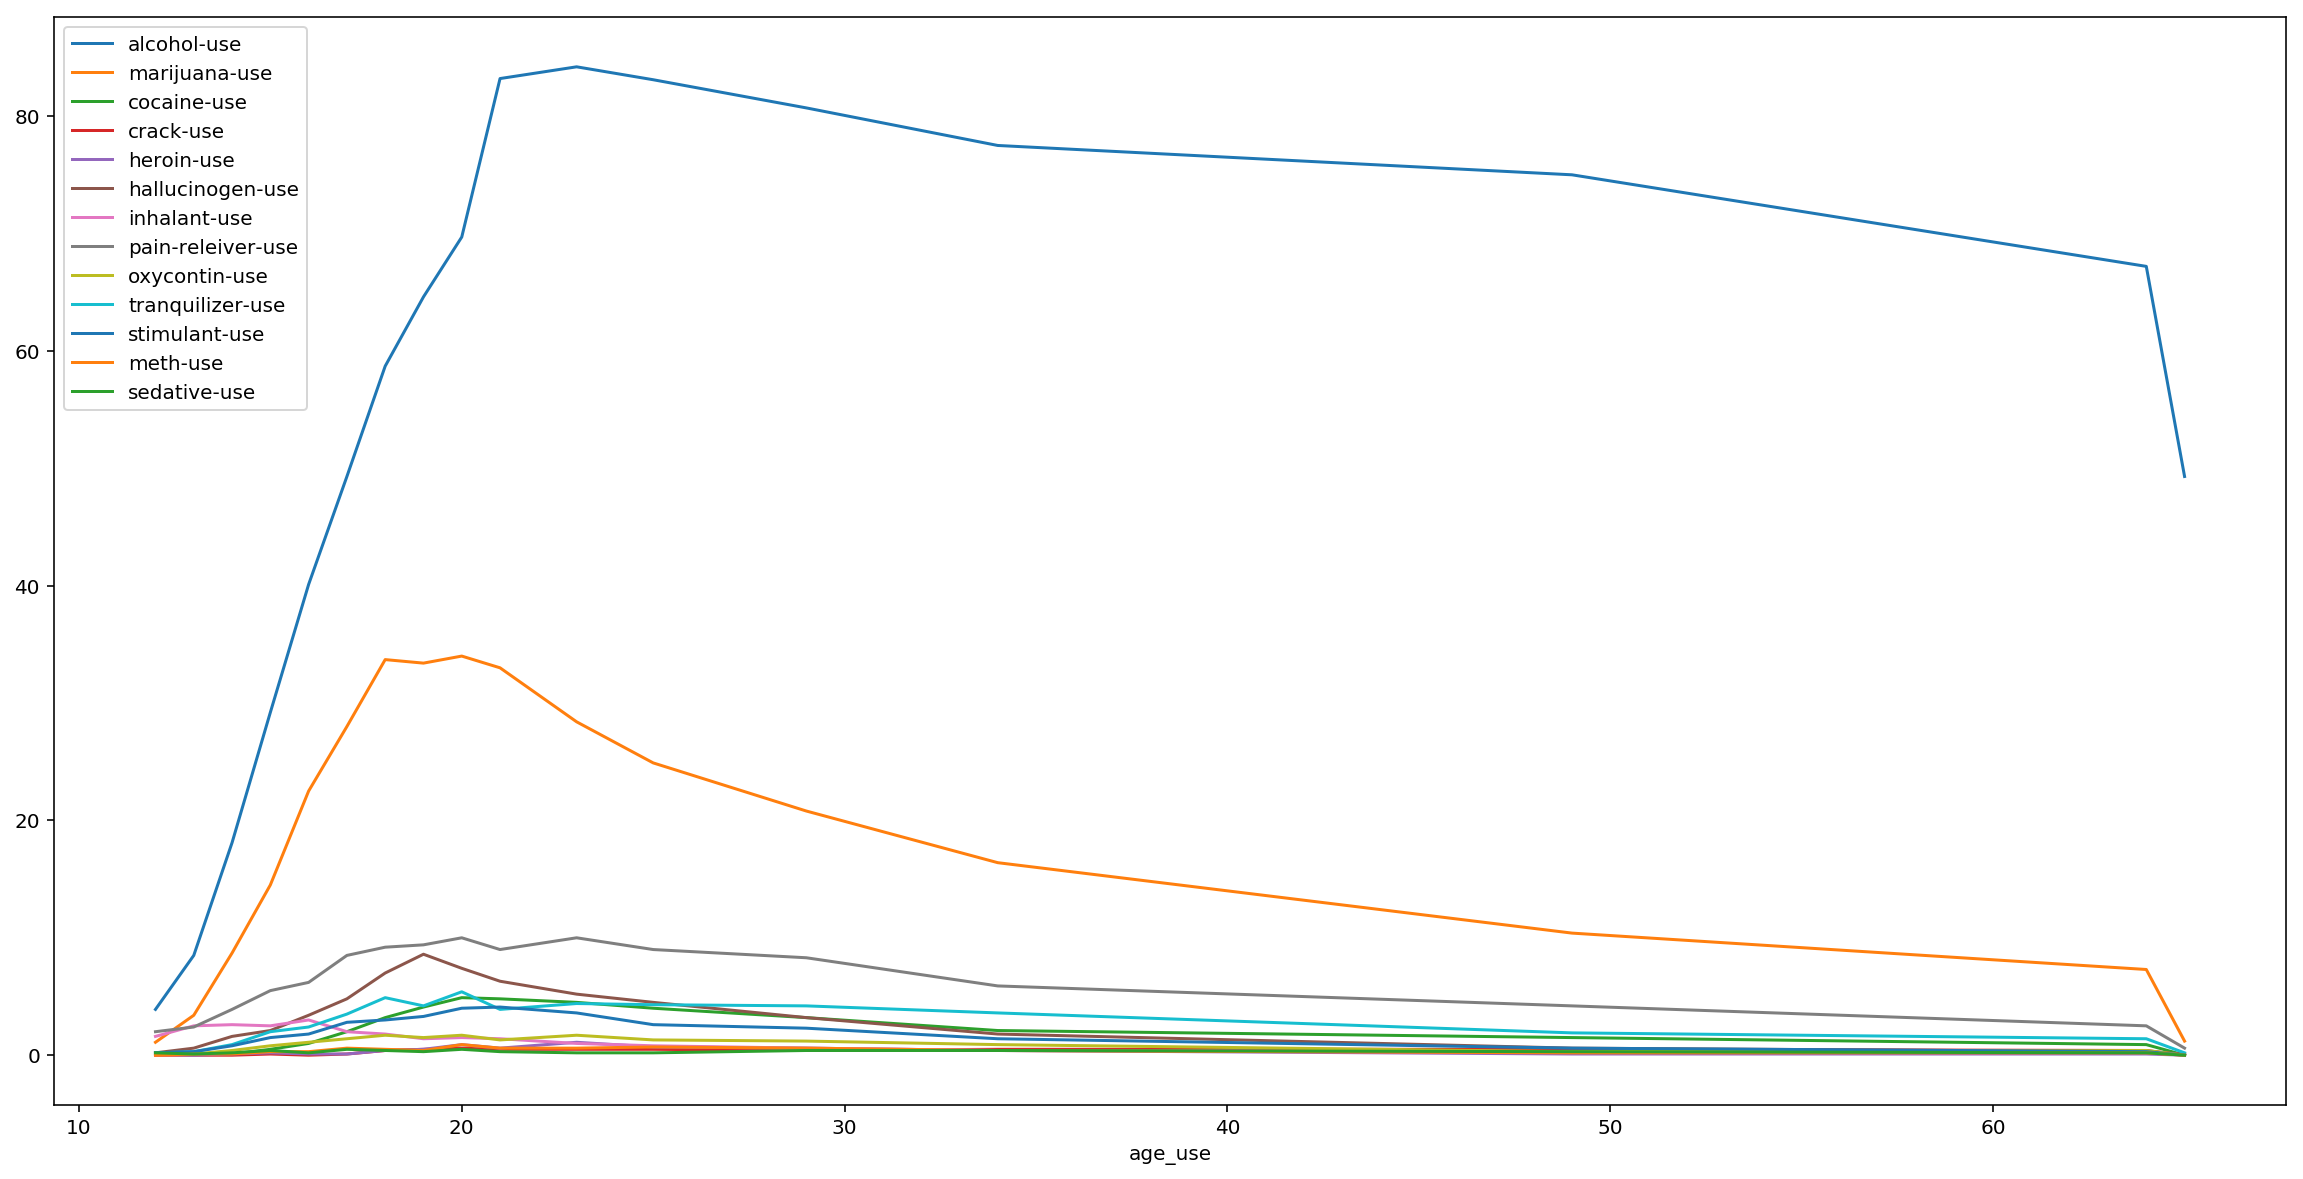

In [46]:
#line graph of drug use
df_use.plot(x= 'age_use',figsize=(20,10))


Obserevations:

Above plot shows that alcohol and marijuana are the most popular choice of drug.

Spike around age 18-20 for marijuana and hallucinogen use


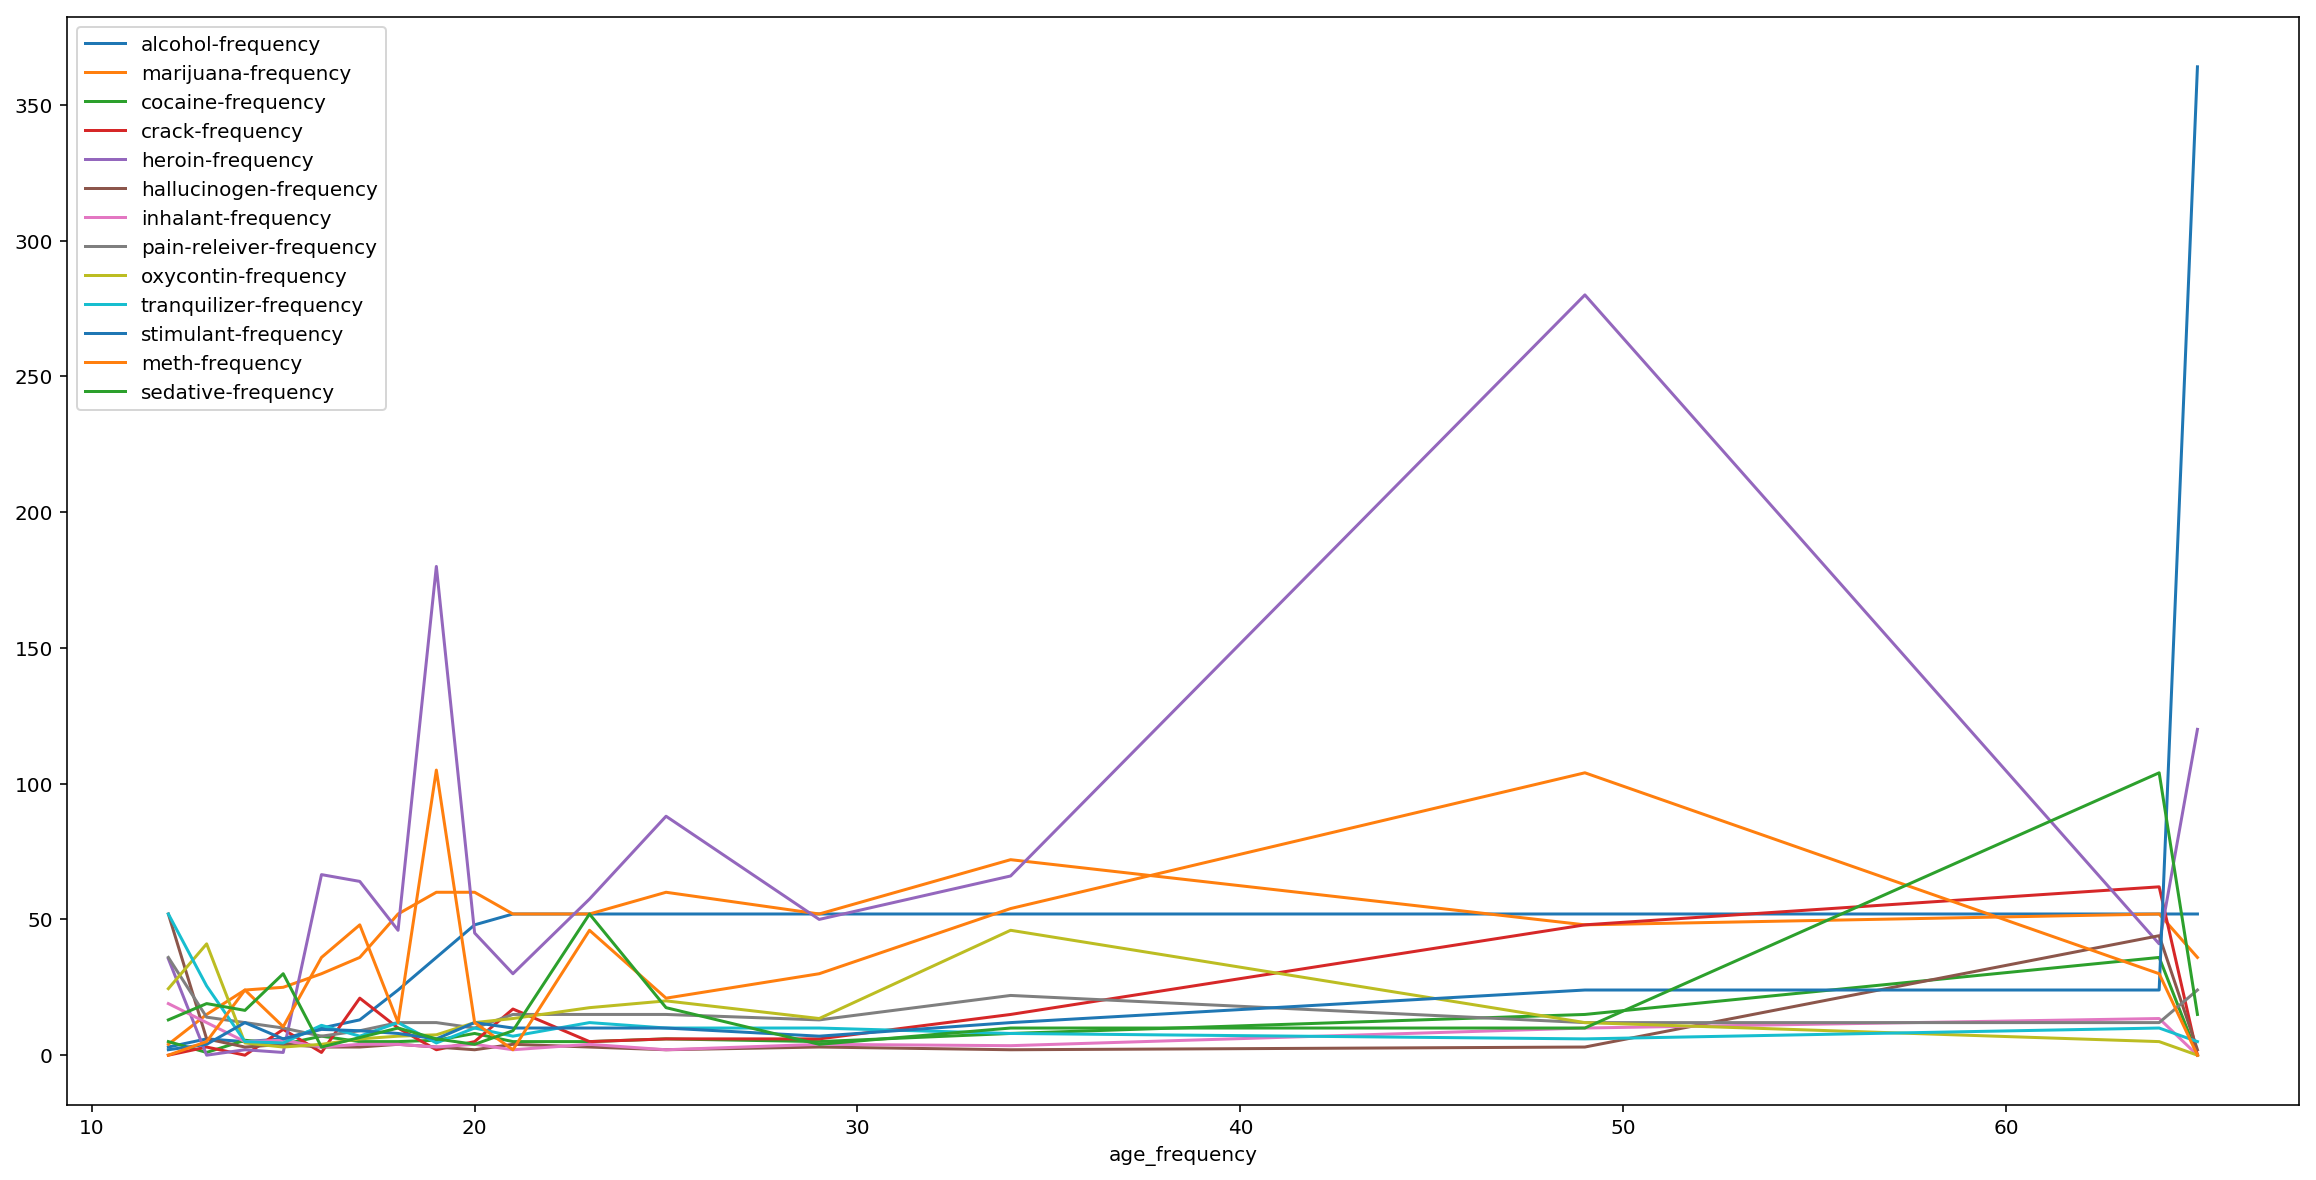

In [47]:
#line graph of drug frequency
df_freq.plot(x= 'age_frequency',figsize=(20,10))

Observations:

Spike in Heroin and Marijuana at age 18-19

Large spike in Heroin between ages 35 and 65


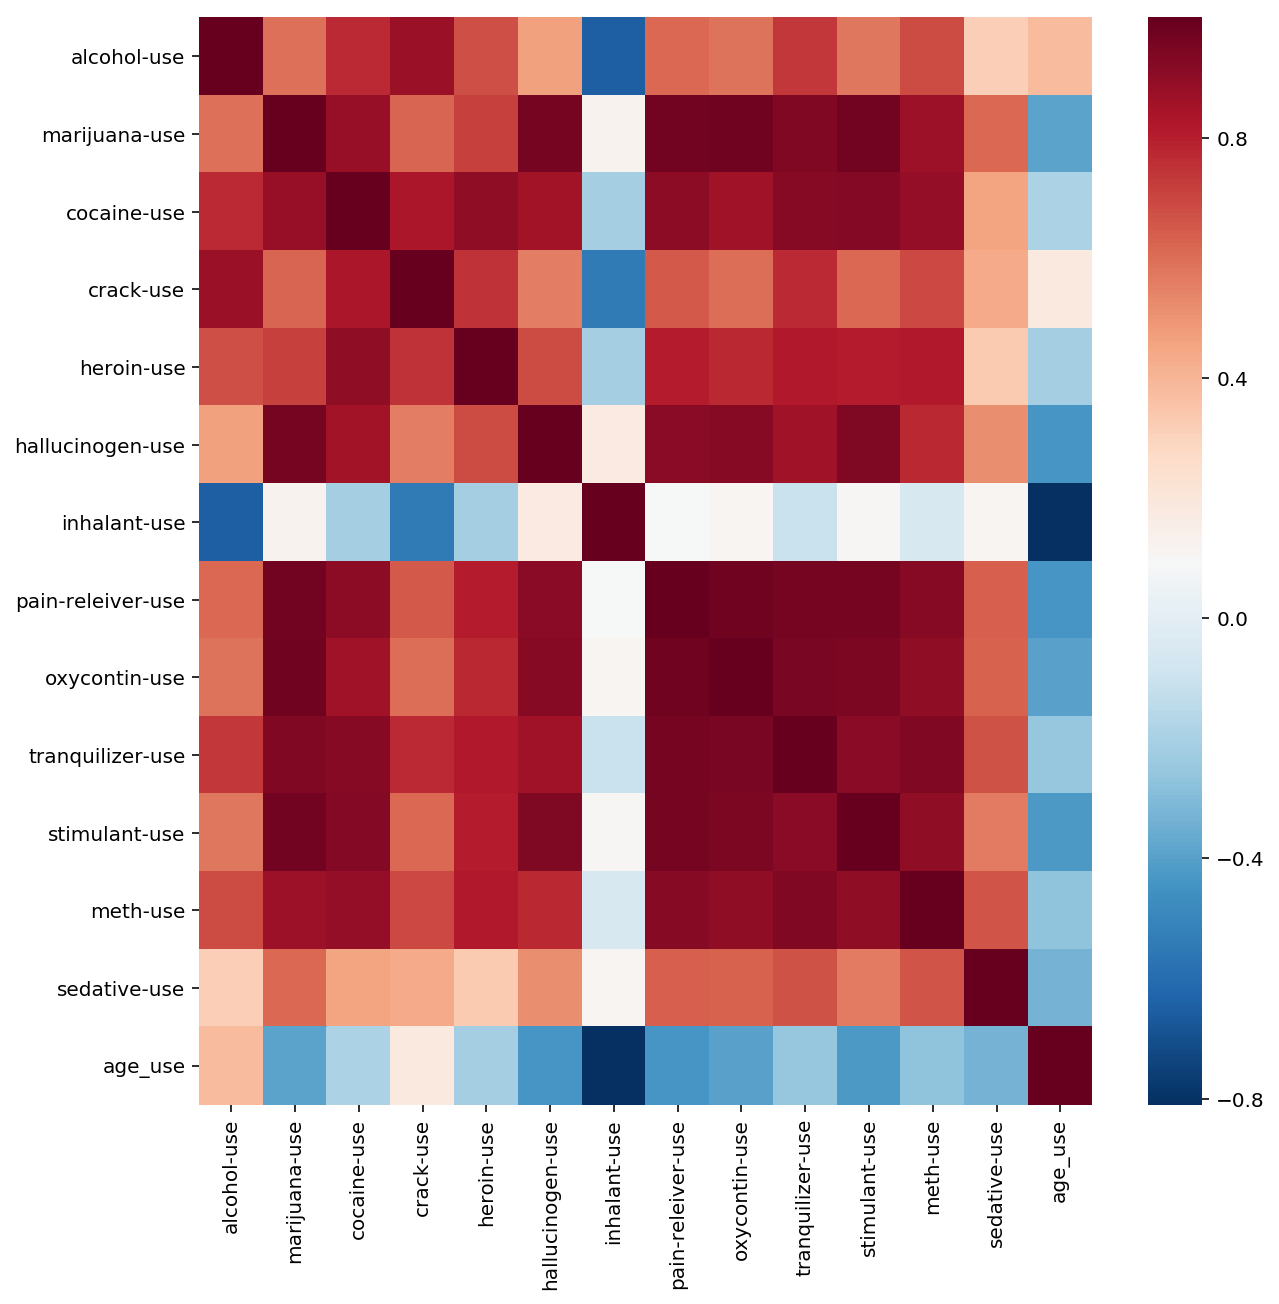

In [48]:
#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_use.corr(), cmap='RdBu_r')

Observations:

inhalent use is negatively correlated or not correlated with all other types of drug use

marijuana use is strongly positively correlated to hallucinogen, pain reliever, oxycontin and stimulants

age is negatively correlated to all drug use except alcohol


In [49]:
#describe drug use
df_use.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
inhalant-use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0
pain-releiver-use,17.0,6.270588,3.166379,0.6,3.9,6.2,9.0,10.0
oxycontin-use,17.0,0.935294,0.608216,0.0,0.4,1.1,1.4,1.7
tranquilizer-use,17.0,2.805882,1.753379,0.2,1.4,3.5,4.2,5.4


In [50]:
#describe drug frequency
df_freq.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-frequency,17.0,68.970588,70.153285,0.0,35.5,50.0,66.5,280.0
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0
inhalant-frequency,17.0,5.794118,4.937291,0.0,3.0,4.0,5.5,19.0
pain-releiver-frequency,17.0,14.705882,6.935098,7.0,12.0,12.0,15.0,36.0
oxycontin-frequency,17.0,13.941176,12.902134,0.0,5.0,12.0,17.5,46.0
tranquilizer-frequency,17.0,11.735294,11.485205,4.5,6.0,10.0,11.0,52.0


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

    Question:

Is there a difference in the usage of marijuana versus oxycontin?

    Hypothesis:

H_0: The difference between the mean of inhalant use and mean of stimulant use is equal to 0.

H_1: The difference between the mean of inhalant use and mean of stimulant use is not equals to 0.

    Deliverables:
Calculate the t Statistic and p value
   




In [51]:
#describe both variables
df_use[['inhalant-use','stimulant-use']].describe()

,inhalant-use,stimulant-use
count,17.000000,17.000000
mean,1.388235,1.917647
std,0.927283,1.407673
min,0.000000,0.000000
25%,0.600000,0.600000
50%,1.400000,1.800000
75%,2.000000,3.000000
max,3.000000,4.100000


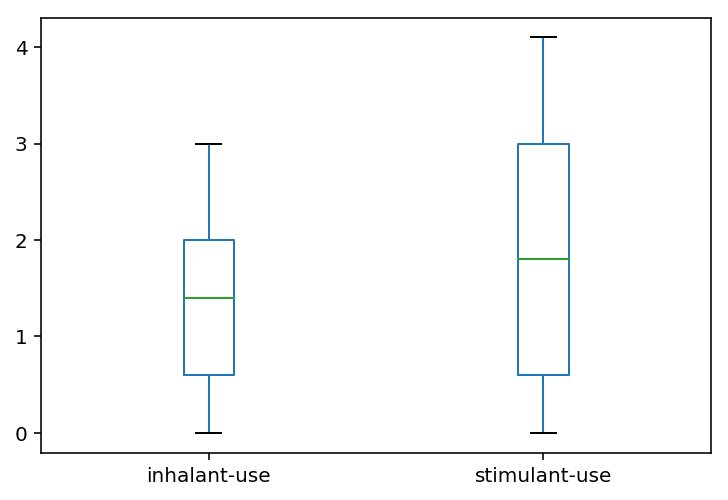

In [52]:
#visualise both variables with a box plot
df_use[['inhalant-use','stimulant-use']].plot.box()

In [53]:
#coefficient correlation
np.corrcoef(df_use['inhalant-use'],df_use['stimulant-use'])

array([[1.        , 0.10838076],
       [0.10838076, 1.        ]])

In [56]:
import scipy.stats as stats

# 95% confidence level
# set alpha
alpha = 0.05

# set distributions
dist1 = df_drug['inhalant-use'] - np.mean(df_drug['stimulant-use'])
dist2 = df_drug['stimulant-use'] - np.mean(df_drug['stimulant-use'])

# calculate t test
results = stats.ttest_ind(dist1, dist2)
p = results.pvalue
a = alpha/2 
# print results
if p == a:
    print('pvalue = '+str(p)+' is equal to ' + str(a) + ', so we can confirm the null hypothesis.')
else:
    print('pvalue = '+str(p)+ 'is not equal to ' + str(a) + ', so we reject the null hypothesis and conclude that the mean of inhalant use is not equal to the mean of stimulant use.')
    

pvalue = 0.20460402112671855is not equal to 0.025, so we reject the null hypothesis and conclude that the mean of inhalant use is not equal to the mean of stimulant use.



**Report**

During the investoigation it was found that the correlation between stimulant and inhalant drug use, is 0.108. This is close to 0 meaning their is very little relationship between these two variables.

It was also found that the t-statistic of the two variables is 1.29. as such with a 95% confidence interval, it has been proven that our test has failed to confirm the null hypothesis.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [57]:
# Pull out the rate variable from the sat dataset.
rate = df_sat['Rate']

        Define, in words, how you numerically define outliers.
Outliers are datapoints that lie outside the (lower quartile - 1.5IQR) to (upper quartile + 1.5IQR) range.
The best way to depict outliers is in a box plot (box-and-whisker plot).

In [58]:
#Calculate the quartile and IQR values
lower_quartile = rate.quantile(0.25)
upper_quartile = rate.quantile(0.75)
IQR = upper_quartile - lower_quartile

print("Q1:", lower_quartile, "Q3:", upper_quartile, "IQR:", IQR)

Q1: 9.0 Q3: 64.0 IQR: 55.0


In [61]:
#loop though all values in rate print any outliers
for value in rate:
    #check for outliers that are greater then the upper quartile
    if value > (upper_quartile + 1.5*IQR):  
        print(value)
    #check for outliers that are less then the lower quartile 
    elif value < (lower_quartile - 1.5*IQR):
        print(value)
    else:
        pass

There are No Outliers

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [ ]:
# used a lot in the work place


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.